# Alucar - analisando as vendas


In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
print('Quantidade de linhas e colunas', alucar.shape) ## 2 anos de dados


Quantidade de linhas e colunas (24, 2)


In [ ]:
print('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt

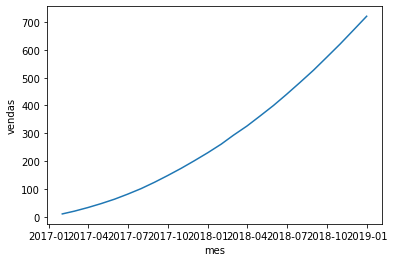

In [ ]:
sns.lineplot(x ='mes', y= 'vendas', data = alucar)

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

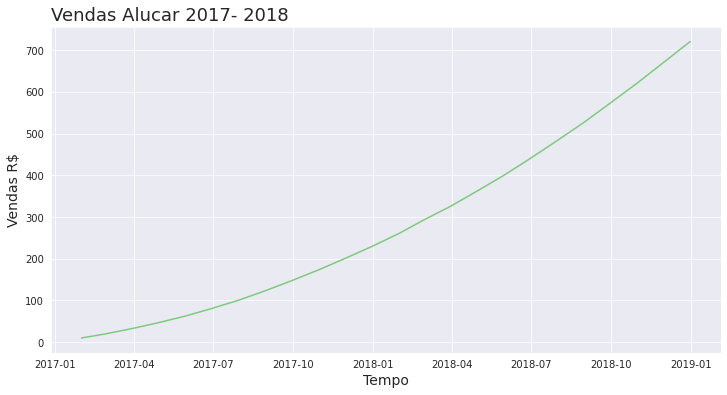

In [ ]:
ax = sns.lineplot(x ='mes', y= 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar 2017- 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas R$', fontsize = 14)
ax = ax

In [ ]:
## df['crescimento_direto'] = df.preco.pct_change()
## df.head()

## Para ver qto variou a venda de um mes para o outro

In [ ]:
alucar['crescimento_direto %'] = alucar.vendas.pct_change()*100

alucar.head()

,mes,vendas,crescimento_direto %
0,2017-01-31,10,NaN
1,2017-02-28,20,100.000000
2,2017-03-31,33,65.000000
3,2017-04-30,47,42.424242
4,2017-05-31,63,34.042553


In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,crescimento_direto %,aumento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,100.000000,10.0
2,2017-03-31,33,65.000000,13.0
3,2017-04-30,47,42.424242,14.0
4,2017-05-31,63,34.042553,16.0


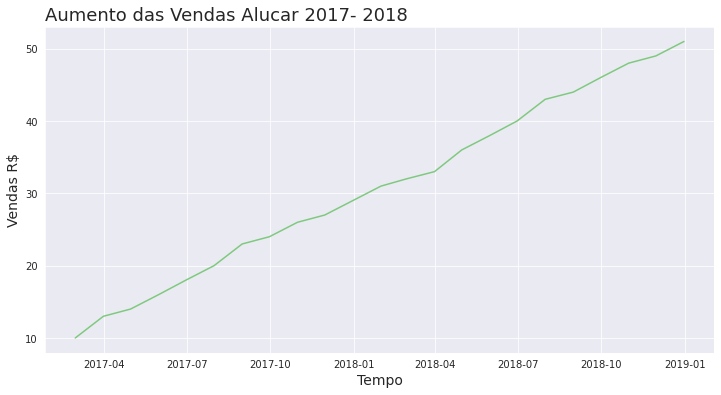

In [ ]:
ax = sns.lineplot(x ='mes', y= 'aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar 2017- 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas R$', fontsize = 14)
ax = ax

In [ ]:
def plotar (titulo, labelx, labely, x, y,dataset):
  ax = sns.lineplot(x =x, y= y, data = dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

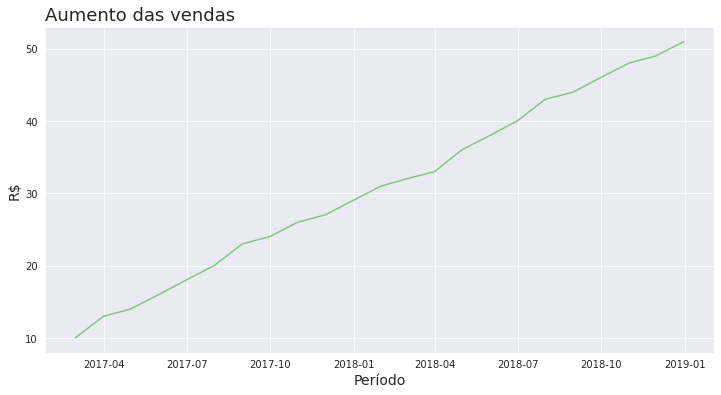

In [ ]:
plotar('Aumento das vendas','Período', 'R$', 'mes', 'aumento', alucar)

In [ ]:
alucar['aceleração'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,crescimento_direto %,aumento,aceleração
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,100.000000,10.0,NaN
2,2017-03-31,33,65.000000,13.0,3.0
3,2017-04-30,47,42.424242,14.0,1.0
4,2017-05-31,63,34.042553,16.0,2.0


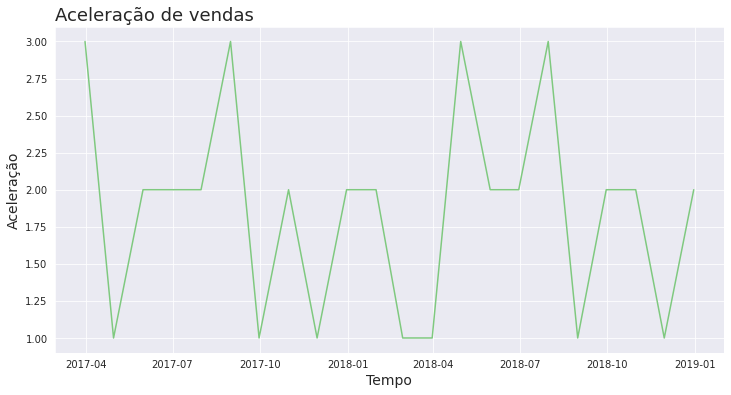

In [ ]:
plotar('Aceleração de vendas', 'Tempo', 'Aceleração', 'mes', 'aceleração', alucar)

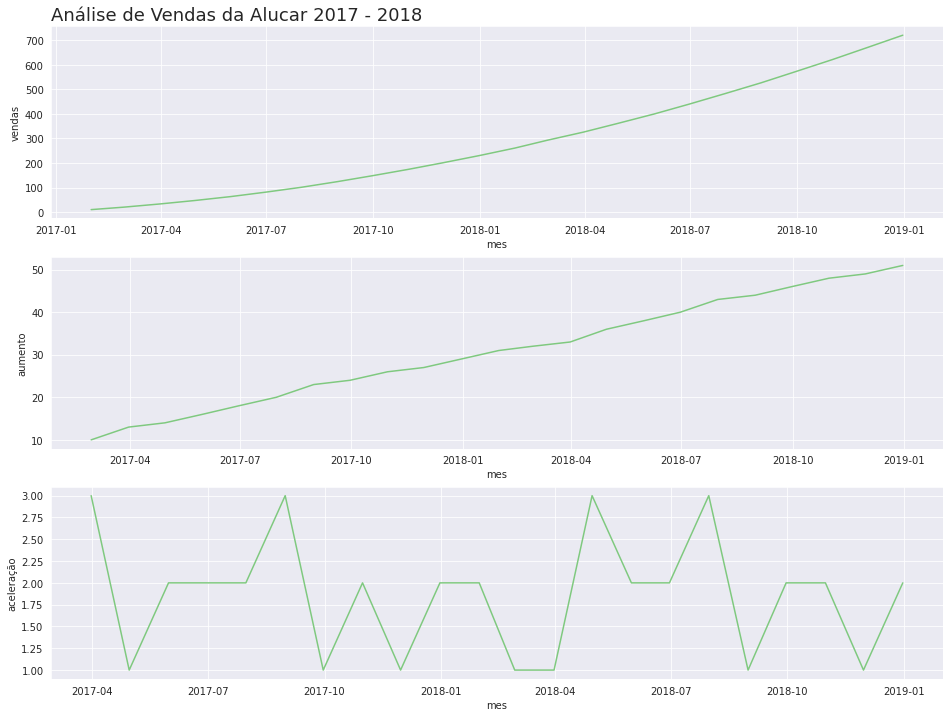

In [ ]:
plt.figure(figsize=(16,12))
ax= plt.subplot(3,1,1)
ax.set_title('Análise de Vendas da Alucar 2017 - 2018', fontsize = 18, loc = 'left')
ax= ax
sns.lineplot(x ='mes', y= 'vendas', data = alucar)
plt.subplot(3,1,2)
sns.lineplot(x ='mes', y= 'aumento', data = alucar)
plt.subplot(3,1,3)
sns.lineplot(x ='mes', y= 'aceleração', data = alucar)

In [ ]:
def plot_comparacao (x, y1,y2,y3, data, titulo):
  plt.figure(figsize=(16,12))
  ax= plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  ax= ax
  sns.lineplot(x =x, y= y1, data = data)
  plt.subplot(3,1,2)
  sns.lineplot(x =x, y= y2, data = data)
  plt.subplot(3,1,3)
  sns.lineplot(x =x, y= y3, data = data)

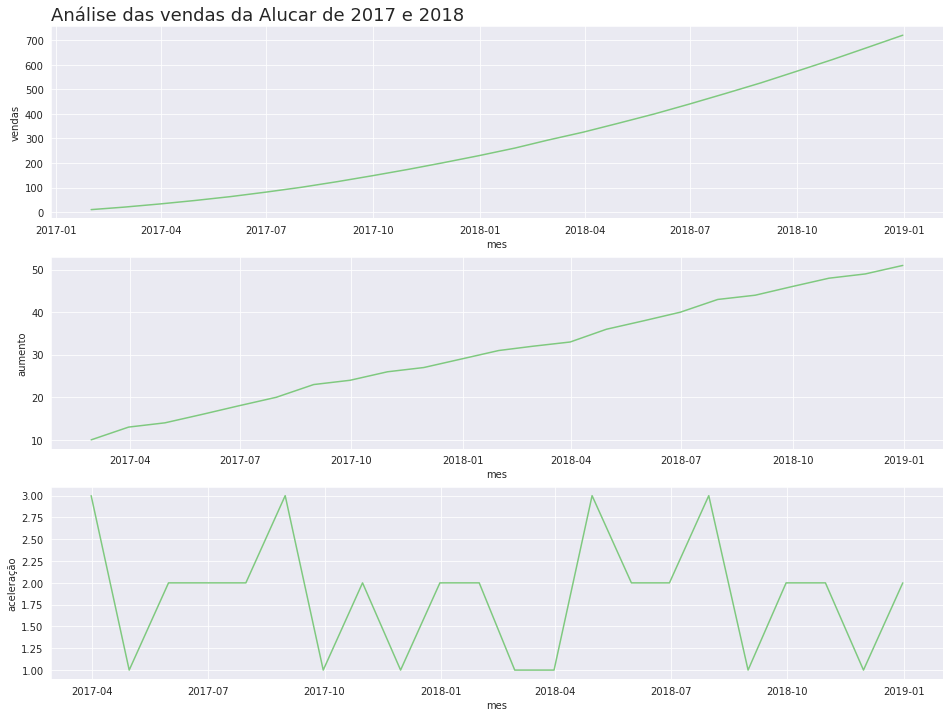

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleração',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018')

## Autocorrelação

In [ ]:
from pandas.plotting import autocorrelation_plot

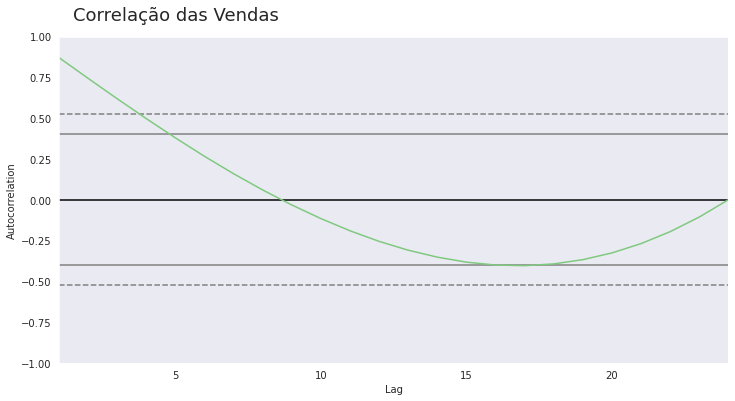

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x= 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax


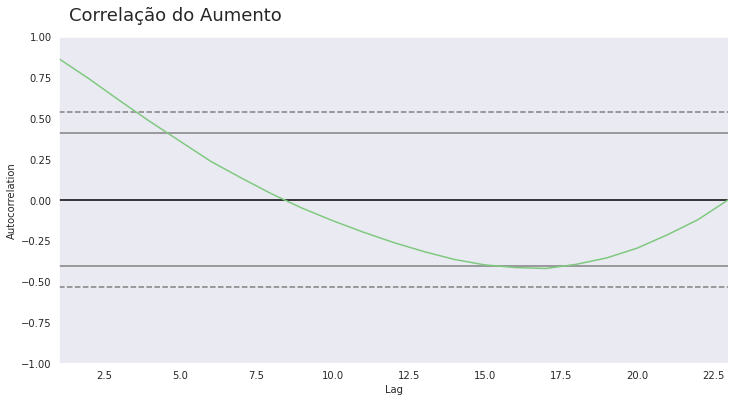

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x= 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

In [ ]:
alucar.head()

,mes,vendas,crescimento_direto %,aumento,aceleração
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,100.000000,10.0,NaN
2,2017-03-31,33,65.000000,13.0,3.0
3,2017-04-30,47,42.424242,14.0,1.0
4,2017-05-31,63,34.042553,16.0,2.0


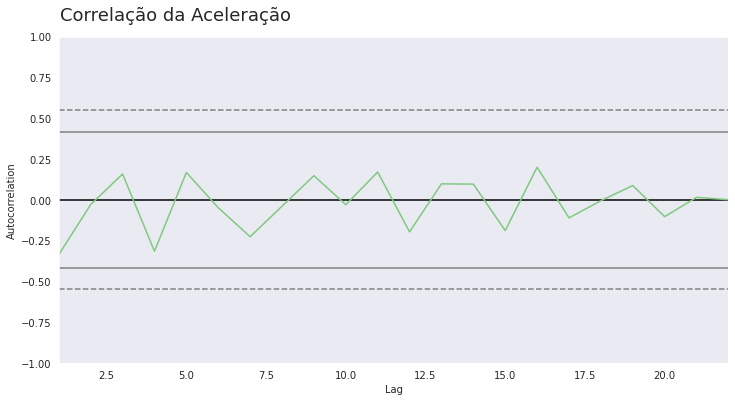

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x= 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleração'][2:])
ax=ax

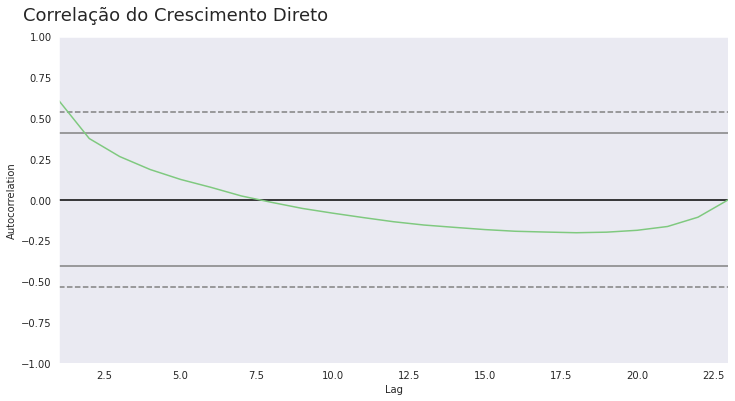

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Crescimento Direto', fontsize = 18, x= 0.26, y = 0.95)
autocorrelation_plot(alucar['crescimento_direto %'][1:])
ax=ax

# Alucar analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [ ]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()

In [ ]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


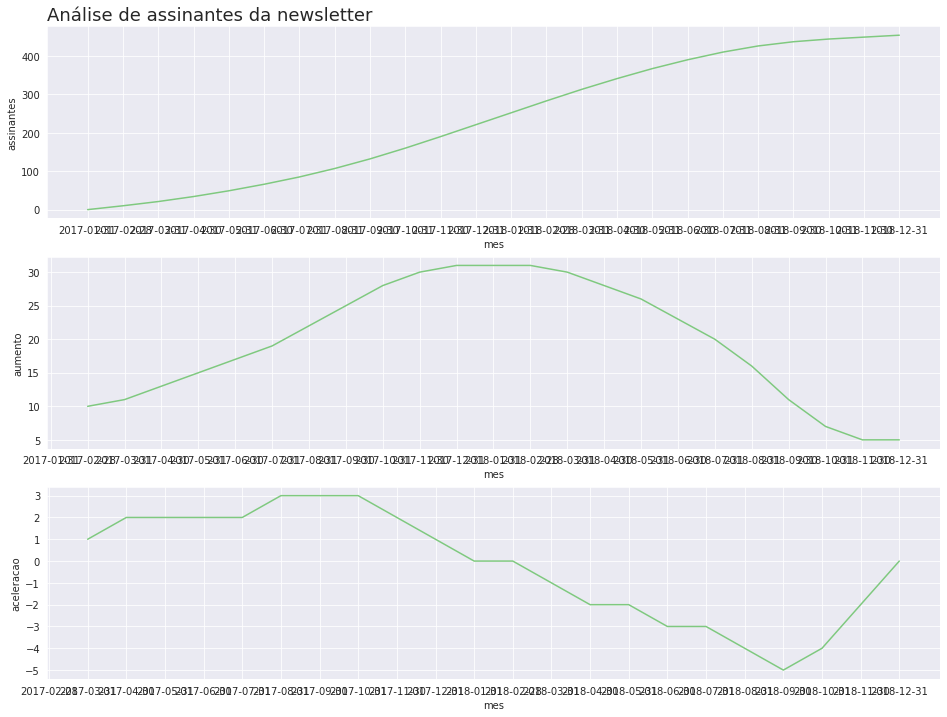

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Análise da sazonalidade e vendas de chocolate

In [ ]:
chocolura = pd.read_csv('chocolura.csv')

In [ ]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [ ]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()

In [ ]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


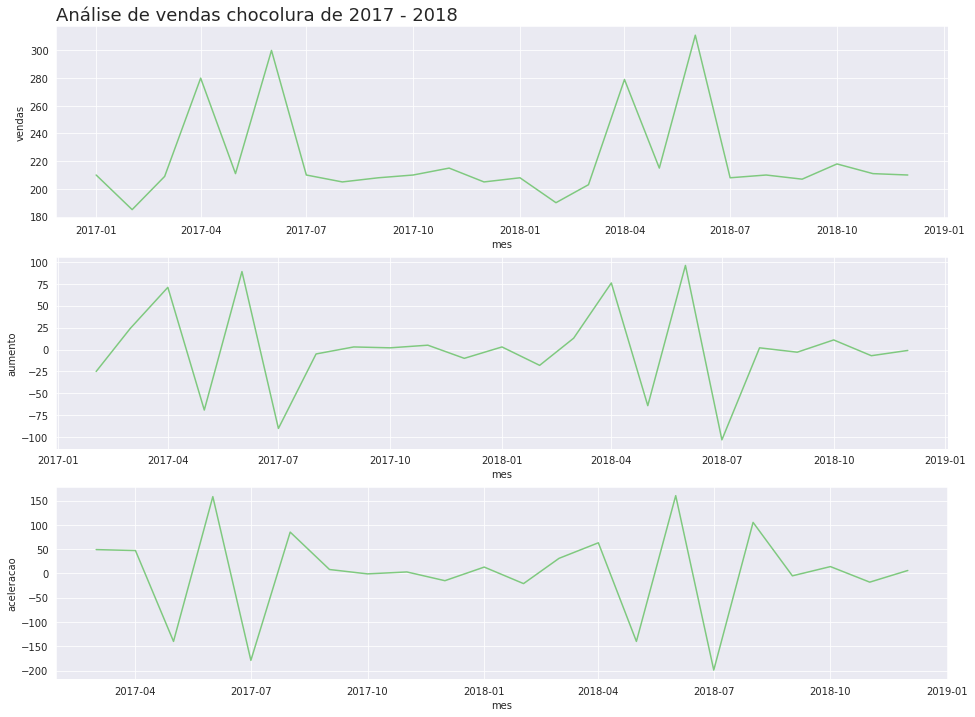

In [ ]:
plot_comparacao('mes','vendas', 'aumento','aceleracao', chocolura, 'Análise de vendas chocolura de 2017 - 2018')

## Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv ('vendas_por_dia.csv')

In [ ]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print ('Quantidade de linhas:', vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
vendas_por_dia['aumento']= vendas_por_dia ['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

In [ ]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


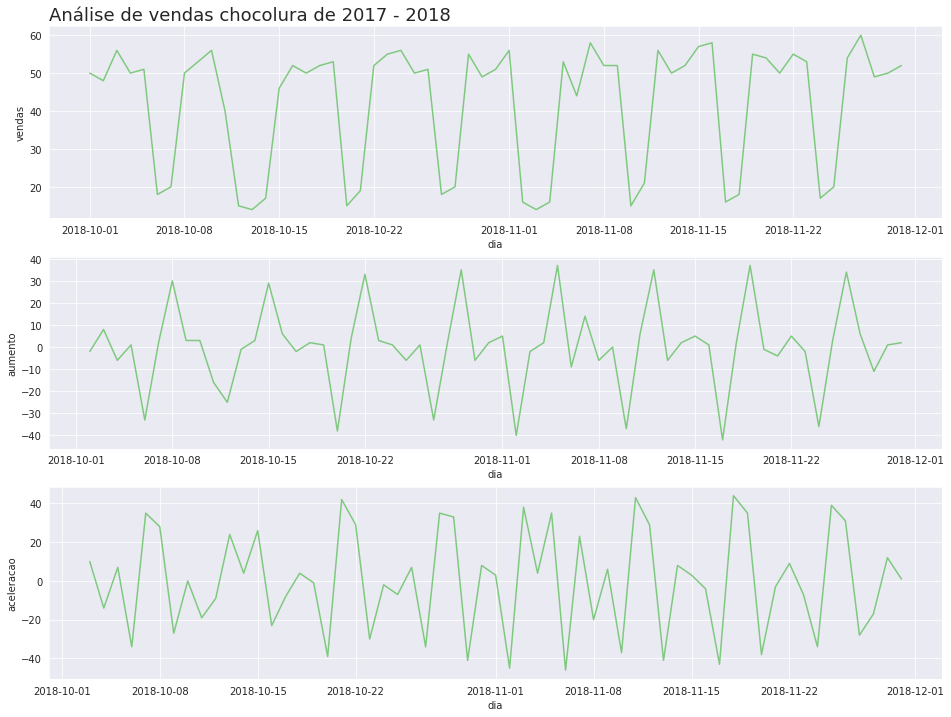

In [ ]:
plot_comparacao('dia','vendas', 'aumento','aceleracao', vendas_por_dia, 'Análise de vendas chocolura de 2017 - 2018')

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.weekday

In [ ]:
vendas_por_dia.head()
vendas_por_dia.dtypes

dia              datetime64[ns]
vendas                    int64
aumento                 float64
aceleracao              float64
dia_da_semana             int64
dtype: object

In [ ]:
dias_semana = {0:'Segunda', 1: 'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado', 6:'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana']= vendas_por_dia['dia_da_semana'].map(dias_semana)

In [ ]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


# Agrupando os dias

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,18.875000,3.000000,30.750000
Quarta,53.111111,1.444444,2.111111
Quinta,51.333333,-1.777778,-3.222222
Segunda,52.333333,33.750000,30.750000
Sexta,44.555556,-6.777778,-5.000000
Sábado,15.875000,-27.750000,-19.875000
Terça,51.666667,-0.666667,-34.250000


**Correlação das Vendas diárias**

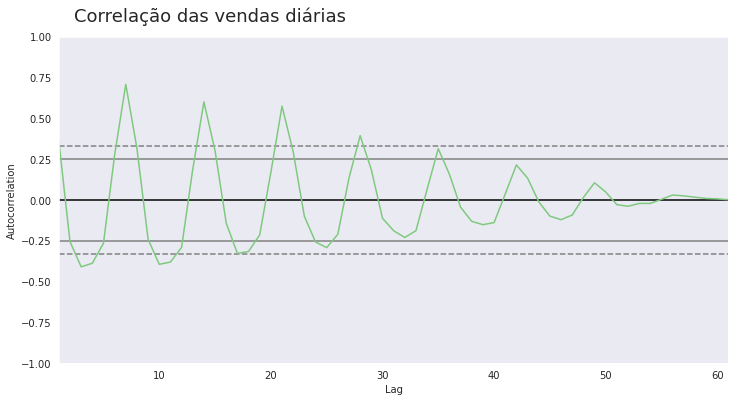

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

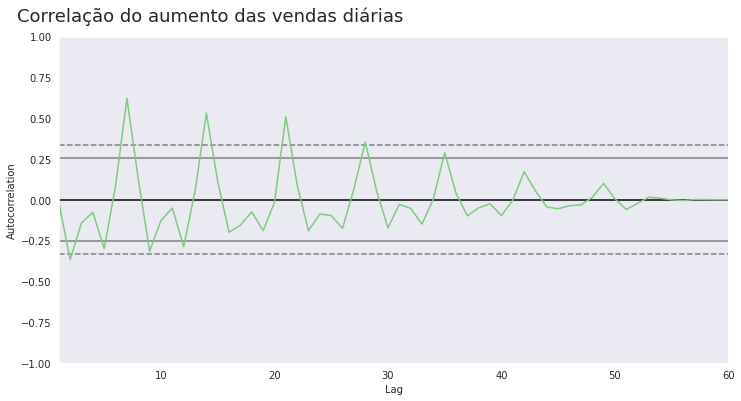

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

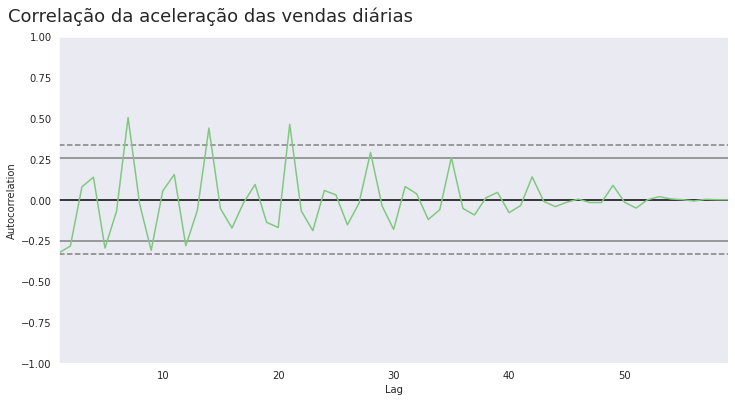

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv ('cafelura.csv')

In [ ]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura ['mes']= pd.to_datetime(cafelura['mes'])

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


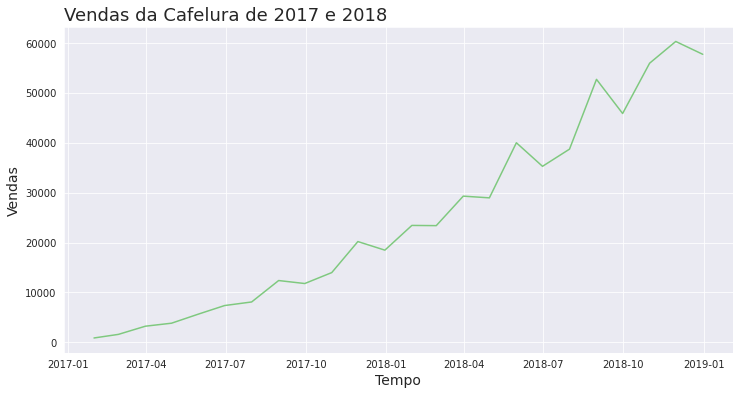

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [ ]:
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


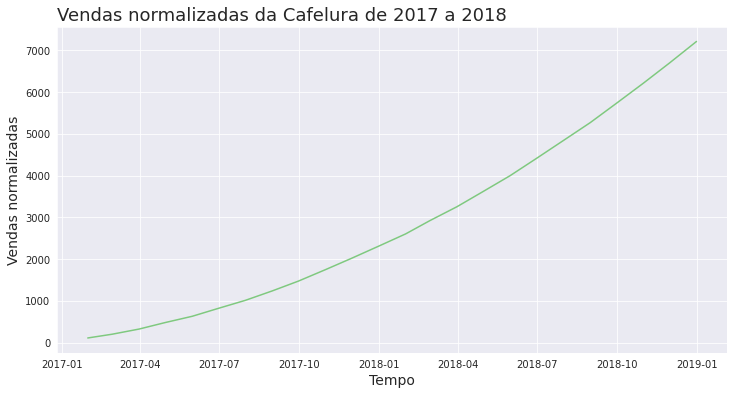

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

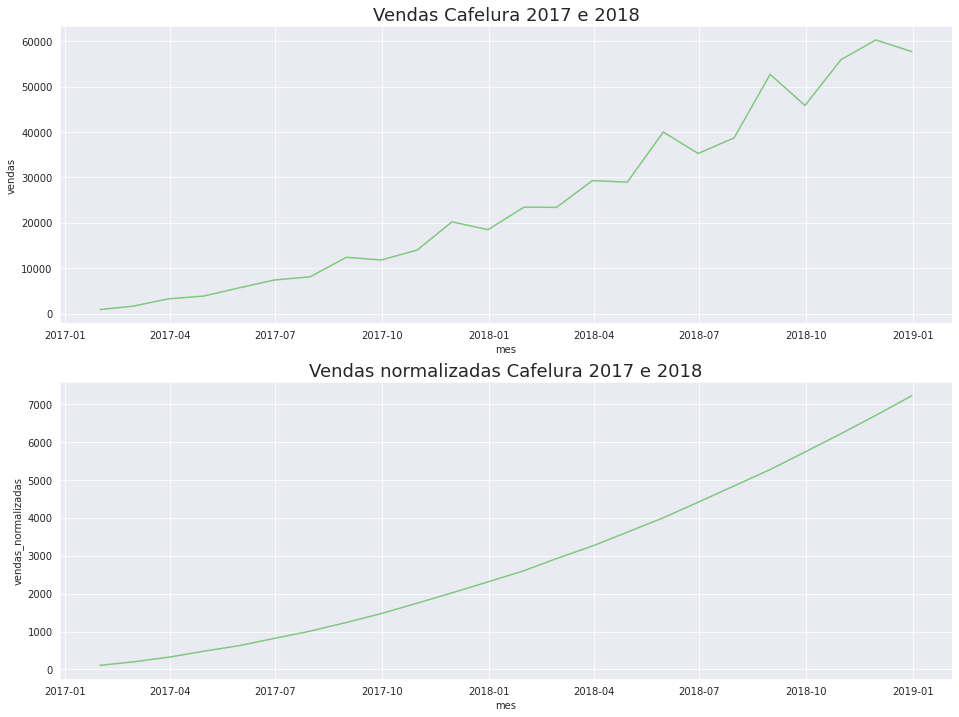

In [ ]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

Sempre precisamos identificar tendencias, sazonalidades e ruídos

#Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


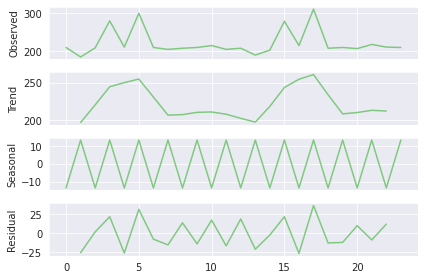

In [ ]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=2)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia,
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


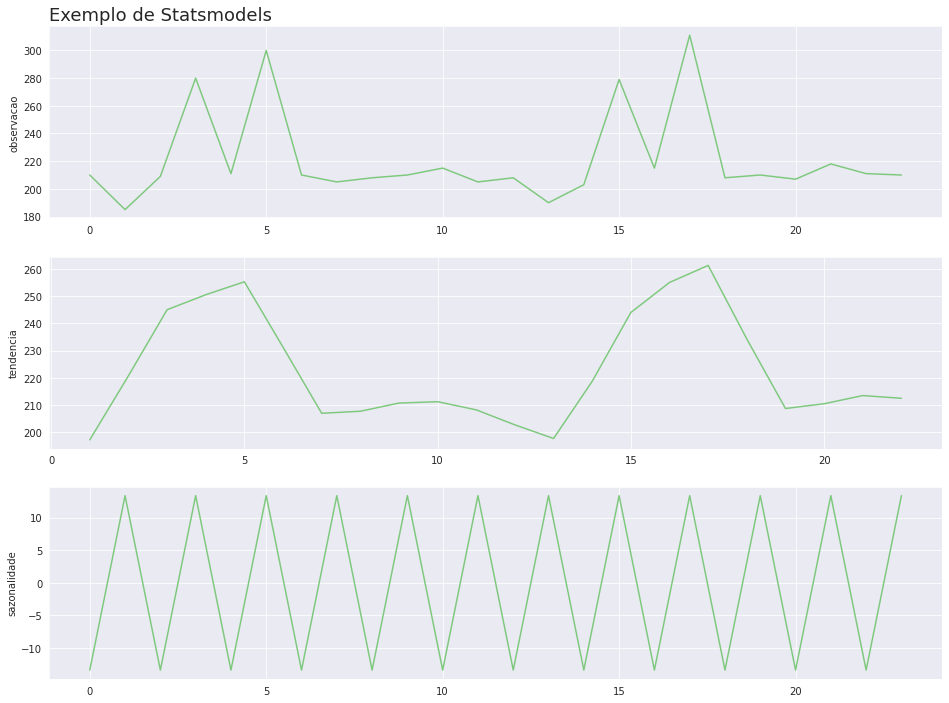

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

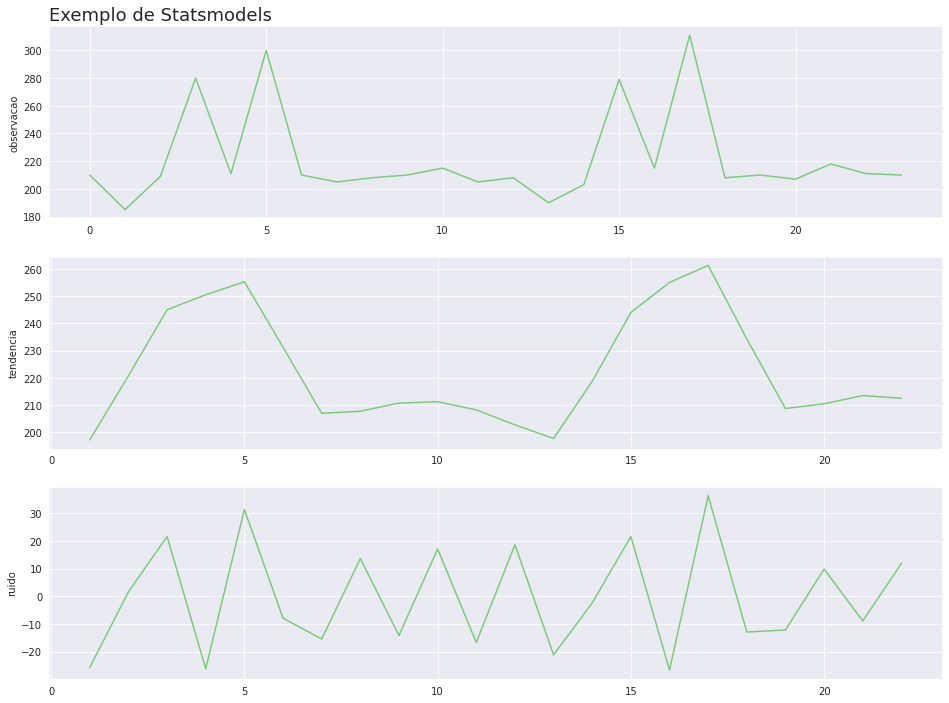

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

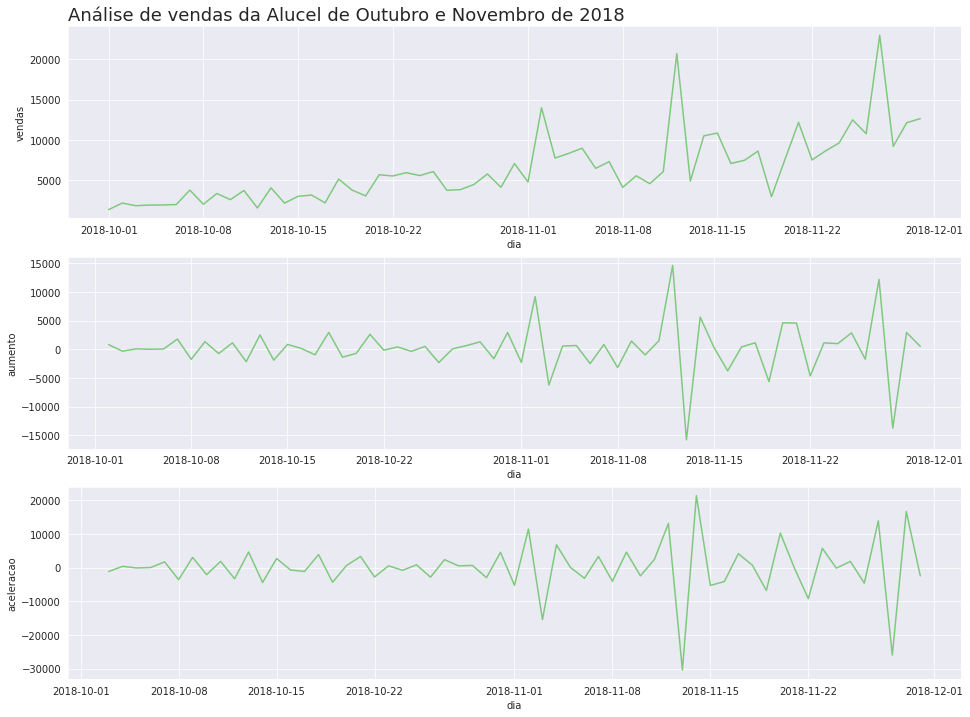

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel - Minimiza o ruído de uma serie temporal**

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() ## Roling já calcula a média móvel - o numero 7 são o número de pontos

In [ ]:
alucel.head(17)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


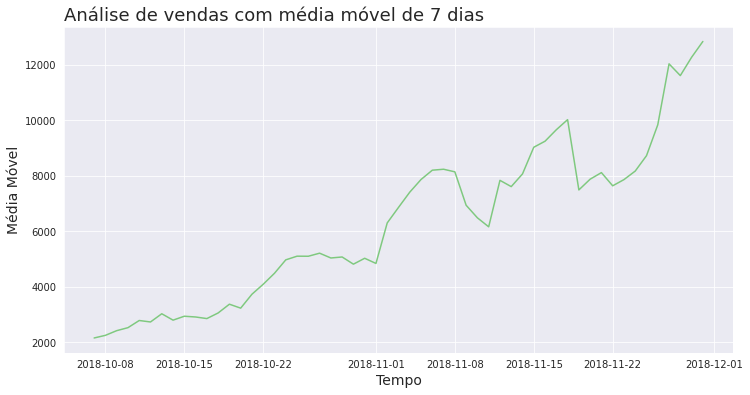

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

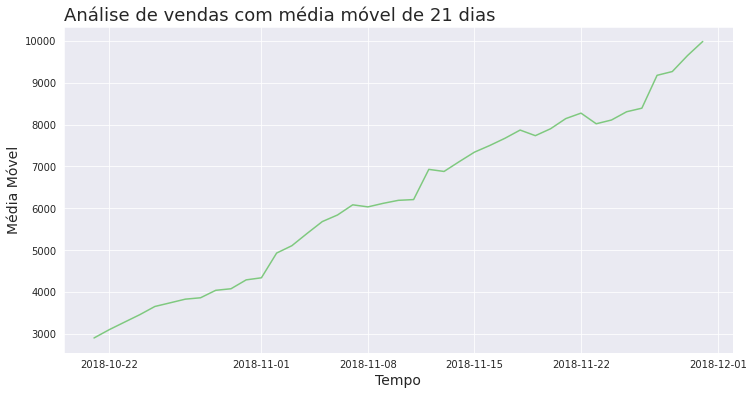

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)  ## Começa a perder a informação

In [ ]:
alucel['media_movel_30'] = alucel['vendas'].rolling(30).mean()

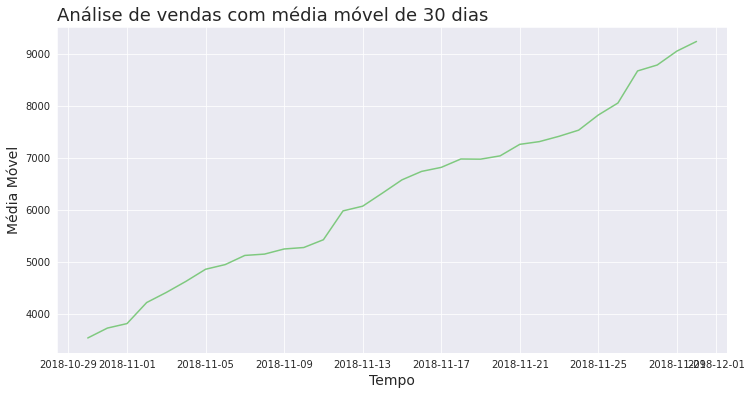

In [ ]:
plotar('Análise de vendas com média móvel de 30 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_30', alucel) ## Começa a perder a informação


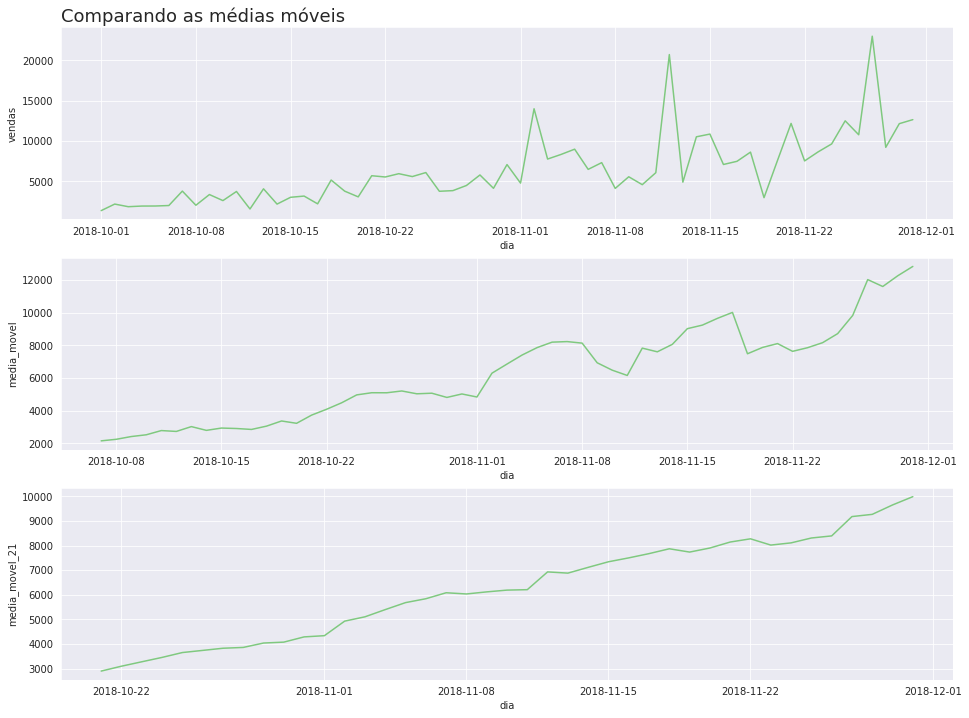

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')